In [1]:
# Import packages
import numpy as np
import os
import csv

# Function to randomly initialize a board with exactly `num_alive` live cells
def initialize_board(rows, cols, num_alive):
    """
    Initialize the board based on the number of rows, number of columns, and cells alive.

    Parameters:
    rows (int): Number of rows in the board.
    cols (int): Number of columns in the board.
    num_alive (int): Number of cells alive.

    Returns:
    numpy.ndarray: The initialized board.
    """
    # Find the total number of cells and ensure the number of live cells is less than or equal to that
    total_cells = rows * cols
    assert num_alive <= total_cells, "Number of live cells exceeds board size"

    # Create an array with the specified number of alive (1) and dead (0) cells
    flat_board = np.array([1] * num_alive + [0] * (total_cells - num_alive))
    np.random.shuffle(flat_board)

    # Reshape it to the board size
    board = flat_board.reshape((rows, cols))

    # Return the board
    return board

# Function to save the board to a CSV file
def save_board_to_csv(board, filename="boards/initial_board.csv"):
    """
    Save the board to a CSV file.

    Parameters:
    board (numpy.ndarray): The board to save.
    filename (str): The file path to save the board.
    """    
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    np.savetxt(filename, board, delimiter=',', fmt='%d')

# === Settings for 5000 cells on a 50% filled board ===
num_alive = 5000
occupancy = 0.5
total_cells = int(num_alive / occupancy)
side_length = int(np.sqrt(total_cells))  # Create roughly square board

rows = cols = side_length  # square board, e.g., 100x100 = 10,000 cells

# Initialize the board
board = initialize_board(rows, cols, num_alive)

# Save the board
save_board_to_csv(board, "boards/random.csv")

# Figure 1

## Figure A

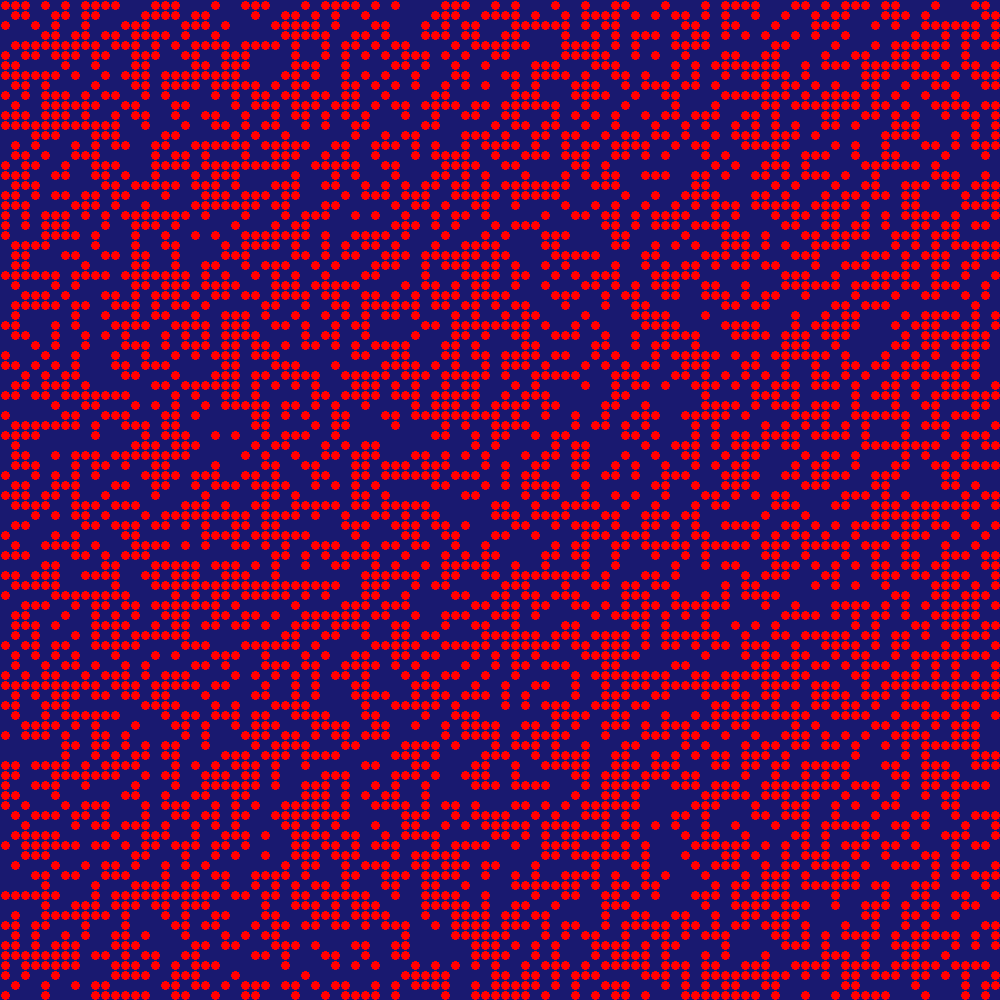

In [2]:
# Import packages
from base_functions import play_game_of_life
from io_utils import read_board_from_file
from draw import draw_game_boards, save_gif, draw_game_board  # Added draw_game_board here
from IPython.display import Image as IPImage

# Parameters
input_file = "boards/random.csv"
output_gif = "output/random.gif"
final_image_file = "output/final_board.png"
cell_width = 10
num_gens = 100

# Run simulation
initial_board = read_board_from_file(input_file)
boards = play_game_of_life(initial_board, num_gens)

# Draw and save GIF
images = draw_game_boards(boards, cell_width=cell_width, bg_color='midnightblue', cell_color='red', shape='circle_inset')
save_gif(images, output_gif, duration=50)

# Save final board as PNG
final_image = draw_game_board(boards[-1], cell_width=cell_width, bg_color='midnightblue', cell_color='red', shape='circle_inset')
final_image.save(final_image_file)

# Display GIF inline (for Jupyter notebook)
IPImage(output_gif)

## Figure B

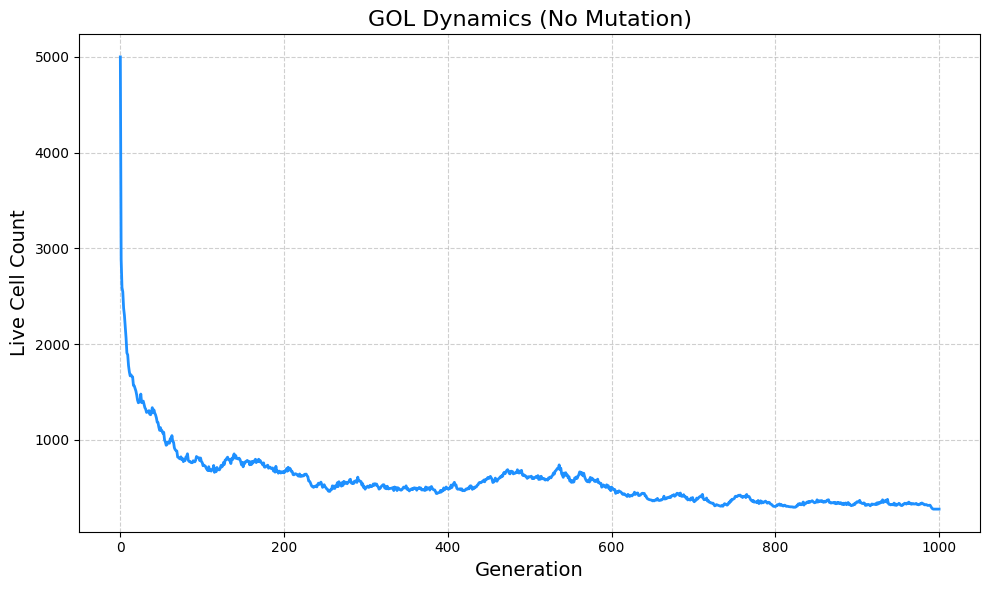

In [3]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# === Parameters ===
input_file = "boards/random.csv"
num_gens = 1000

# === Step 1: Load board and run simulation ===
initial_board = read_board_from_file(input_file)
boards = play_game_of_life(initial_board, num_gens=num_gens)

# === Step 2: Count live cells per generation ===
live_counts = [np.sum(board) for board in boards]

# === Step 3: Plot population dynamics ===
plt.figure(figsize=(10, 6))
plt.plot(range(len(live_counts)), live_counts, color='dodgerblue', linewidth=2)
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Live Cell Count', fontsize=14)
plt.title('GOL Dynamics (No Mutation)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("output/gol_population_dynamics.png")
plt.show()

# Figures 2 - 6

In [ ]:
# Import packages
from mutation_functions import play_game_of_life_with_mutation
from io_utils import read_board_from_file
import matplotlib.pyplot as plt
import numpy as np

# Parameters
mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.4, 1.0]
mutation_magnitudes = [0.25, 0.5, 0.75, 1.0, 1.5, 2, 3, 4, 5, 6, 10]
initial_board = read_board_from_file("boards/random.csv")

# Initialize lists to store the results
generations = []
populations = []
avg_lonely_thresholds = []
avg_born_thresholds = []
avg_crowded_thresholds = []

# Find the total number of runs
total_runs = len(mutation_rates) * len(mutation_magnitudes)
run_count = 1

# Iterate through the mutation rates
for rate in mutation_rates:
    print(f"\n--- Starting runs for mutation rate {rate} ---")
    # Iterate through the mutation magnitudes
    for mag in mutation_magnitudes:
        print(f"Run {run_count}/{total_runs} → Rate: {rate}, Magnitude: {mag}")
        # Run the simulation
        results = play_game_of_life_with_mutation(initial_board, num_gens=1000,
                                                          mutation_rate=rate, mutation_magnitude=mag)
        # Store the results from the simulation
        generations.append((rate, mag, results[0]))
        if rate==0.01 and mag==1.0:
            figure2b_live_cell_population = results[1]
            figure2c_board = results[2]
        if rate==0.05 and mag==6.0:
            figure2d_live_cell_population = results[1]
            figure2e_board = results[2]
        if rate==0.01 and mag==5.0:
            figure3b_board = results[2]
        if rate==0.05 and mag==0.5:
            figure3c_board = results[2]
        if rate==0.05 and mag==1.0:
            figure4b_board = results[3]
        if rate==0.4 and mag==1.5:
            figure4c_board = results[3]
            figure5b_board = results[4]
        if rate==0.05 and mag==6.0:
            figure5c_board = results[4]
            figure6b_board = results[5]
        if rate==0.1 and mag==0.5:
            figure6c_board = results[5]
        populations.append((rate, mag, results[6]))
        avg_lonely_thresholds.append((rate, mag, results[7]))
        avg_born_thresholds.append((rate, mag, results[8]))
        avg_crowded_thresholds.append((rate, mag, results[9]))
        # Print the generation at which the simulation reached steady state
        print(f"    ↳ Steady state reached at generation: {results[0]}")
        # Increment run_count
        run_count += 1


--- Starting runs for mutation rate 0.01 ---
Run 1/66 → Rate: 0.01, Magnitude: 0.25
    ↳ Steady state reached at generation: 1000
Run 2/66 → Rate: 0.01, Magnitude: 0.5
    ↳ Steady state reached at generation: 1000
Run 3/66 → Rate: 0.01, Magnitude: 0.75
    ↳ Steady state reached at generation: 304
Run 4/66 → Rate: 0.01, Magnitude: 1.0


## Figure 2

### Figure A

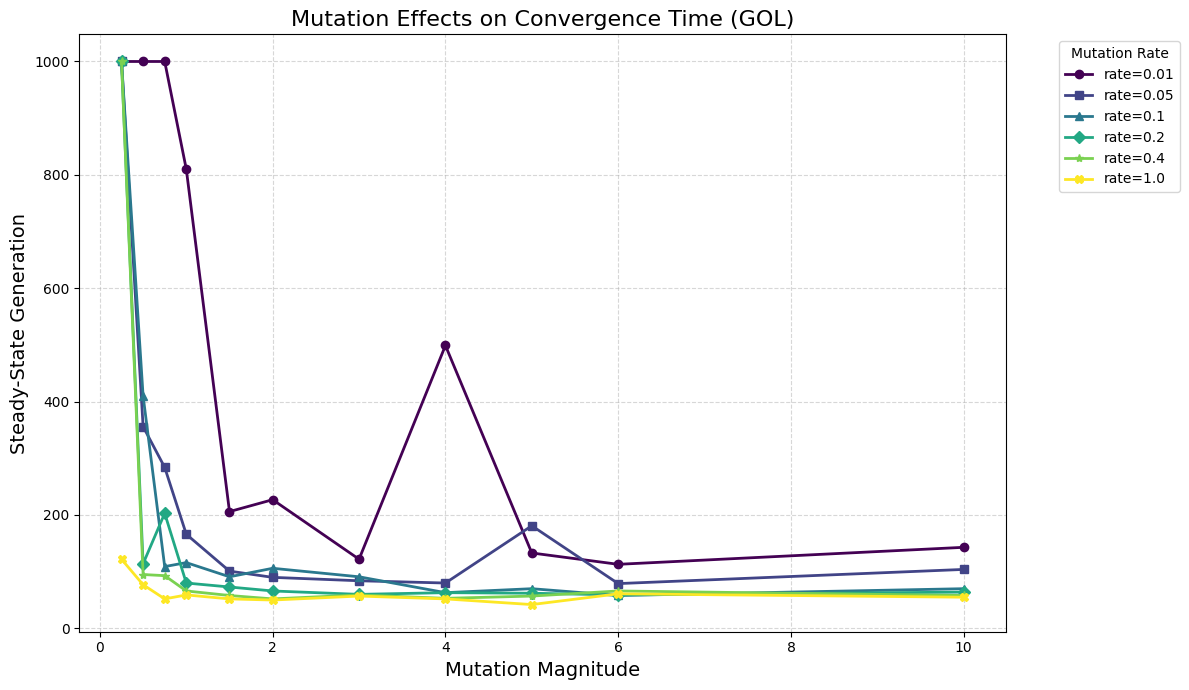

In [17]:
# Plotting
colors = plt.cm.viridis(np.linspace(0, 1, len(mutation_rates)))
markers = ['o', 's', '^', 'D', '*', 'X', 'P']

plt.figure(figsize=(12, 7))
for i, rate in enumerate(mutation_rates):
    xs = [mag for r, mag, gen in generations if r == rate]
    ys = [gen for r, mag, gen in generations if r == rate]
    plt.plot(xs, ys, color=colors[i], marker=markers[i], label=f"rate={rate}", linewidth=2)

plt.xlabel("Mutation Magnitude", fontsize=14)
plt.ylabel("Steady-State Generation", fontsize=14)
plt.title("Mutation Effects on Convergence Time (GOL)", fontsize=16)
plt.legend(title="Mutation Rate", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("output/mutation_vs_steady_state.png")
plt.show()

### Figure B

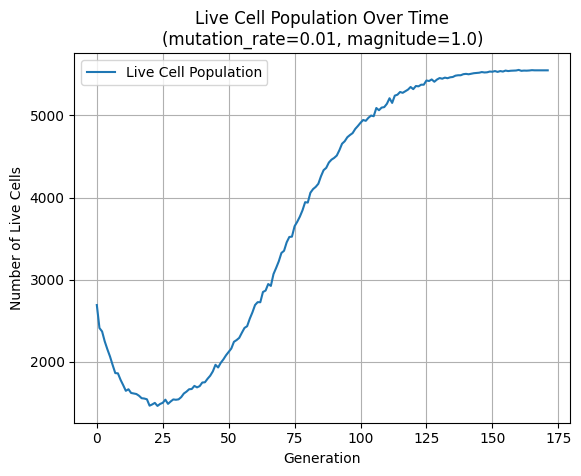

In [6]:
plt.plot(range(len(figure2b_live_cell_population)), figure2b_live_cell_population, label='Live Cell Population')
plt.xlabel('Generation')
plt.ylabel('Number of Live Cells')
plt.title('Live Cell Population Over Time\n(mutation_rate=0.01, magnitude=1.0)')
plt.grid(True)
plt.legend()
plt.savefig("output/mutation_vs_steady_state_rate_0.01_mag_1.0.png")
plt.show()

### Figure C

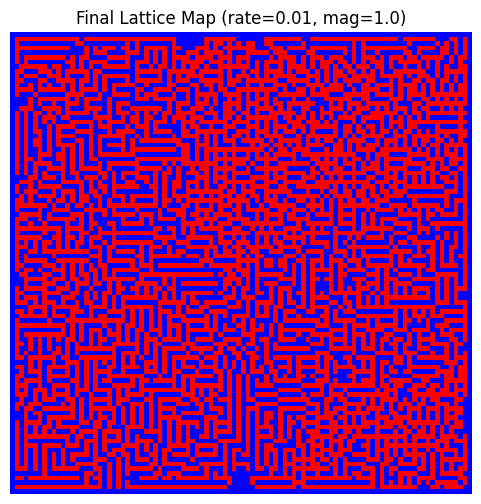

In [7]:
# Import packages
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a colormap: 0 = blue (dead), 1 = red (alive)
cmap = ListedColormap(['blue', 'red'])

# Initialize mutation rate and magnitude
rate = 0.01
mag = 1.0

# Plot a color map of the final board
plt.figure(figsize=(6, 6))
plt.imshow(figure2c_board, cmap=cmap)
plt.title(f'Final Lattice Map (rate={rate}, mag={mag})')
plt.axis('off')

# Save the figure
plt.savefig(f"output/mutation_vs_steady_state_lattice_map_rate_{rate}_mag_{mag}.png", bbox_inches='tight')
plt.show()

### Figure D

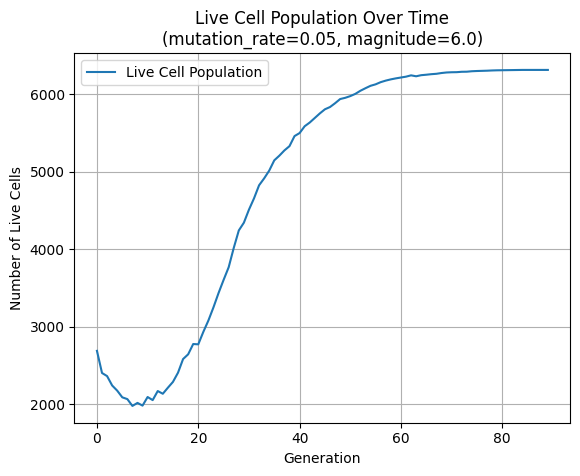

In [8]:
plt.plot(range(len(figure2d_live_cell_population)), figure2d_live_cell_population, label='Live Cell Population')
plt.xlabel('Generation')
plt.ylabel('Number of Live Cells')
plt.title('Live Cell Population Over Time\n(mutation_rate=0.05, magnitude=6.0)')
plt.grid(True)
plt.legend()
plt.savefig("output/mutation_vs_steady_state_rate_0.05_mag_6.0.png")
plt.show()

### Figure E

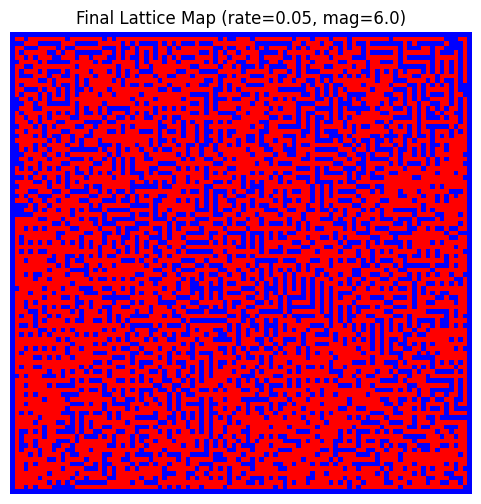

In [9]:
# Create a colormap: 0 = blue (dead), 1 = red (alive)
cmap = ListedColormap(['blue', 'red'])

# Initialize mutation rate and magnitude
rate = 0.05
mag = 6.0

# Plot a color map of the final board
plt.figure(figsize=(6, 6))
plt.imshow(figure2e_board, cmap=cmap)
plt.title(f'Final Lattice Map (rate={rate}, mag={mag})')
plt.axis('off')

# Save the figure
plt.savefig(f"output/mutation_vs_steady_state_lattice_map_rate_{rate}_mag_{mag}.png", bbox_inches='tight')
plt.show()

## Figure 3

### Figure A

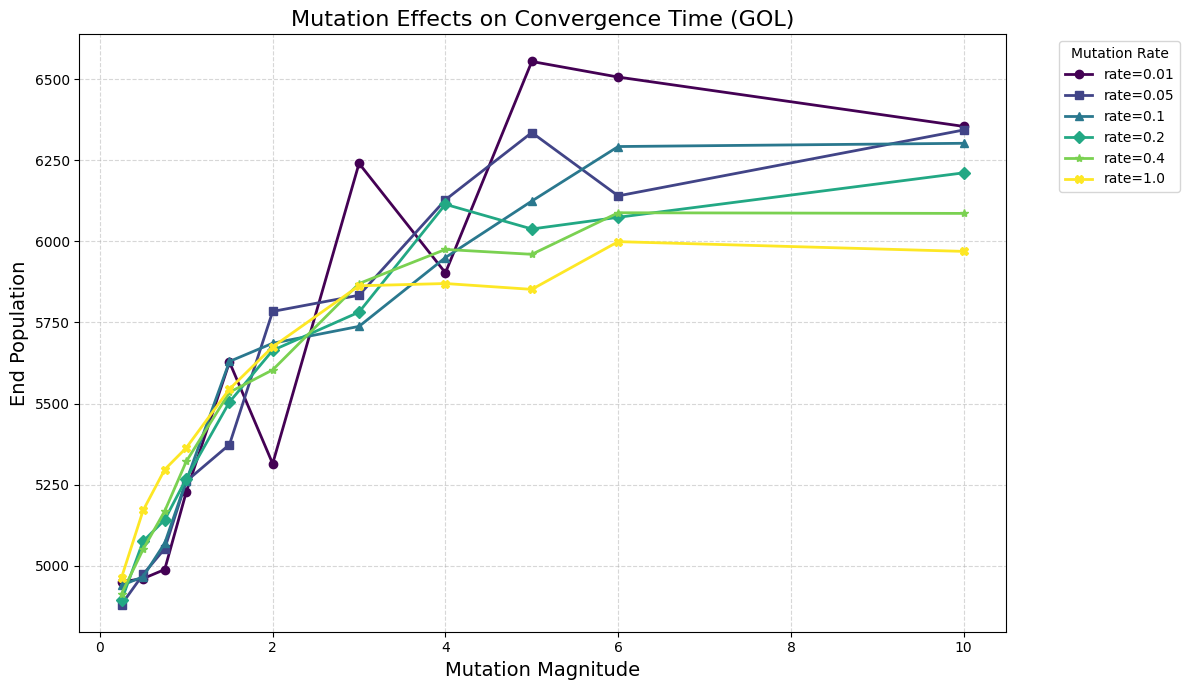

In [19]:
# Plotting
colors = plt.cm.viridis(np.linspace(0, 1, len(mutation_rates)))
markers = ['o', 's', '^', 'D', '*', 'X', 'P']

plt.figure(figsize=(12, 7))
for i, rate in enumerate(mutation_rates):
    xs = [mag for r, mag, pop in populations if r == rate]
    ys = [pop for r, mag, pop in populations if r == rate]
    plt.plot(xs, ys, color=colors[i], marker=markers[i], label=f"rate={rate}", linewidth=2)

plt.xlabel("Mutation Magnitude", fontsize=14)
plt.ylabel("End Population", fontsize=14)
plt.title("Mutation Effects on Convergence Time (GOL)", fontsize=16)
plt.legend(title="Mutation Rate", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("output/mutation_vs_final_population.png")
plt.show()

### Figure B

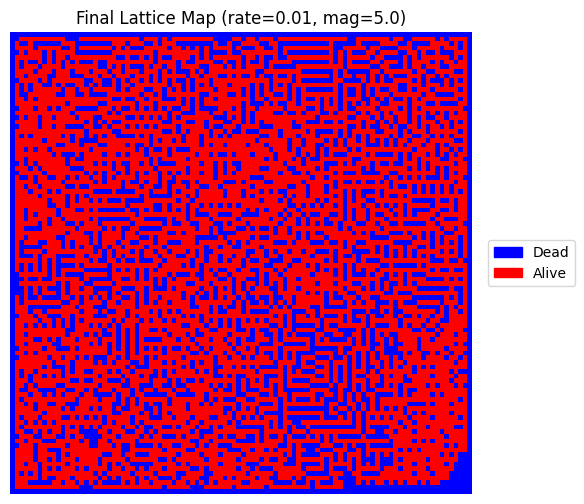

In [11]:
# Import package for custom legend patches
import matplotlib.patches as mpatches

# Create a colormap: 0 = blue (dead), 1 = red (alive)
cmap = ListedColormap(['blue', 'red'])

# Initialize mutation rate and magnitude for labeling
rate = 0.01
mag = 5.0

# Plot a color map of the final board
plt.figure(figsize=(6, 6))
plt.imshow(figure3b_board, cmap=cmap)
plt.title(f'Final Lattice Map (rate={rate}, mag={mag})')
plt.axis('off')

# Add a legend to label and live cells (red) and dead cells (blue)
dead_patch = mpatches.Patch(color='blue', label='Dead')
alive_patch = mpatches.Patch(color='red', label='Alive')
plt.legend(handles=[dead_patch, alive_patch], loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=True)

# Save the figure
plt.savefig(f"output/mutation_vs_steady_state_lattice_map_rate_{rate}_mag_{mag}.png", bbox_inches='tight')
plt.show()

### Figure C

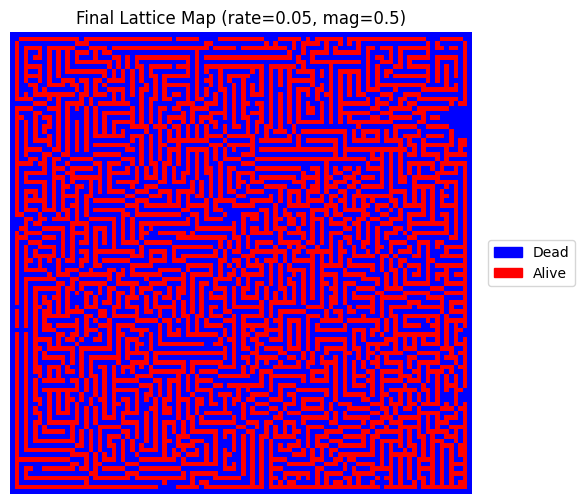

In [12]:
# Create a colormap: 0 = blue (dead), 1 = red (alive)
cmap = ListedColormap(['blue', 'red'])

# Initialize mutation rate and magnitude for labeling
rate = 0.05
mag = 0.5

# Plot a color map of the final board
plt.figure(figsize=(6, 6))
plt.imshow(figure3c_board, cmap=cmap)
plt.title(f'Final Lattice Map (rate={rate}, mag={mag})')
plt.axis('off')

# Add a legend to label and live cells (red) and dead cells (blue)
dead_patch = mpatches.Patch(color='blue', label='Dead')
alive_patch = mpatches.Patch(color='red', label='Alive')
plt.legend(handles=[dead_patch, alive_patch], loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=True)

# Save the figure
plt.savefig(f"output/mutation_vs_steady_state_lattice_map_rate_{rate}_mag_{mag}.png", bbox_inches='tight')
plt.show()

## Figure 4

### Figure A

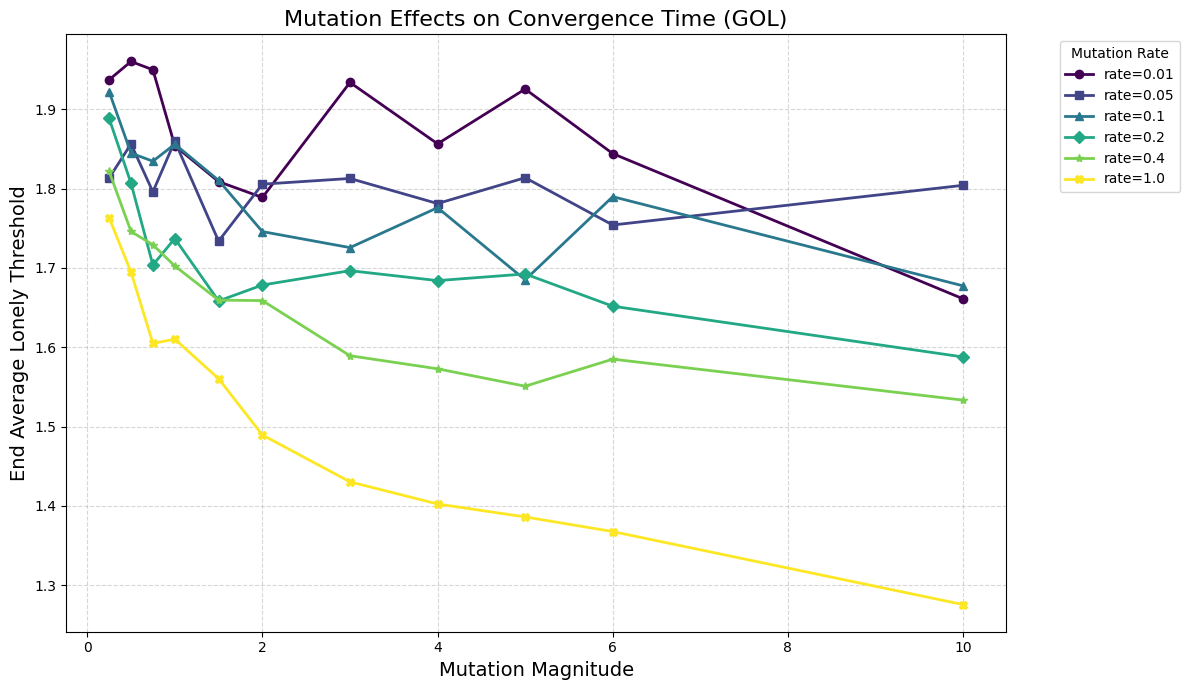

In [20]:
# Plotting
colors = plt.cm.viridis(np.linspace(0, 1, len(mutation_rates)))
markers = ['o', 's', '^', 'D', '*', 'X', 'P']

plt.figure(figsize=(12, 7))
for i, rate in enumerate(mutation_rates):
    xs = [mag for r, mag, avg_lonely_threshold in avg_lonely_thresholds if r == rate]
    ys = [avg_lonely_threshold for r, mag, avg_lonely_threshold in avg_lonely_thresholds if r == rate]
    plt.plot(xs, ys, color=colors[i], marker=markers[i], label=f"rate={rate}", linewidth=2)

plt.xlabel("Mutation Magnitude", fontsize=14)
plt.ylabel("End Average Lonely Threshold", fontsize=14)
plt.title("Mutation Effects on Convergence Time (GOL)", fontsize=16)
plt.legend(title="Mutation Rate", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("output/mutation_vs_lonely_threshold.png")
plt.show()

### Figure B

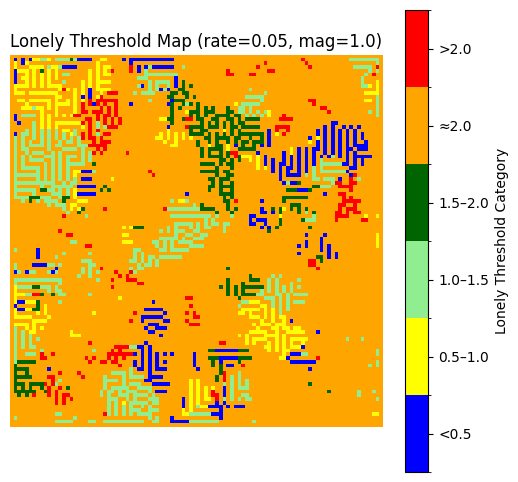

In [14]:
# Import package
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

# Define parameters
rate = 0.05
mag = 1.0

# Credit to chatGPT: Showing me how to plot the heatmap

# Define custom colormap and value boundaries
cmap = ListedColormap(['blue', 'yellow', 'lightgreen', 'darkgreen', 'orange', 'red'])
norm = BoundaryNorm([0.0, 0.5, 1.0, 1.5, 2.0, 2.01, 10.0], ncolors=len(cmap.colors))

# Credit to chatGPT for showing me how to graph this heatmap

# Plot figure
plt.figure(figsize=(6, 6))
im = plt.imshow(figure4b_board, cmap=cmap, norm=norm)
plt.title(f'Lonely Threshold Map (rate={rate}, mag={mag})')
plt.axis('off')

# Colorbar with custom ticks — matching bin centers
ticks = [0.25, 0.75, 1.25, 1.75, 2.005, 6.0]
labels = ['<0.5', '0.5–1.0', '1.0–1.5', '1.5–2.0', '≈2.0', '>2.0']
cbar = plt.colorbar(im, ticks=ticks)
cbar.ax.set_yticklabels(labels)
cbar.set_label('Lonely Threshold Category')

# Save figure
plt.savefig(f"output/lonely_threshold_map_rate_{rate}_mag_{mag}.png", bbox_inches='tight')
plt.show()

### Figure C

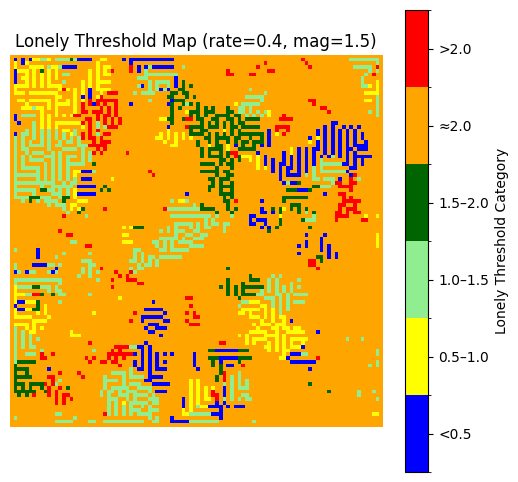

In [15]:
# Define parameters
rate = 0.4
mag = 1.5

# Credit to chatGPT: Showing me how to plot the heatmap

# Define custom colormap and value boundaries
cmap = ListedColormap(['blue', 'yellow', 'lightgreen', 'darkgreen', 'orange', 'red'])
norm = BoundaryNorm([0.0, 0.5, 1.0, 1.5, 2.0, 2.01, 10.0], ncolors=len(cmap.colors))

# Plot figure
plt.figure(figsize=(6, 6))
im = plt.imshow(figure4b_board, cmap=cmap, norm=norm)
plt.title(f'Lonely Threshold Map (rate={rate}, mag={mag})')
plt.axis('off')

# Colorbar with custom ticks — matching bin centers
ticks = [0.25, 0.75, 1.25, 1.75, 2.005, 6.0]
labels = ['<0.5', '0.5–1.0', '1.0–1.5', '1.5–2.0', '≈2.0', '>2.0']
cbar = plt.colorbar(im, ticks=ticks)
cbar.ax.set_yticklabels(labels)
cbar.set_label('Lonely Threshold Category')

# Save figure
plt.savefig(f"output/lonely_threshold_map_rate_{rate}_mag_{mag}.png", bbox_inches='tight')
plt.show()

## Figure 5

### Figure A

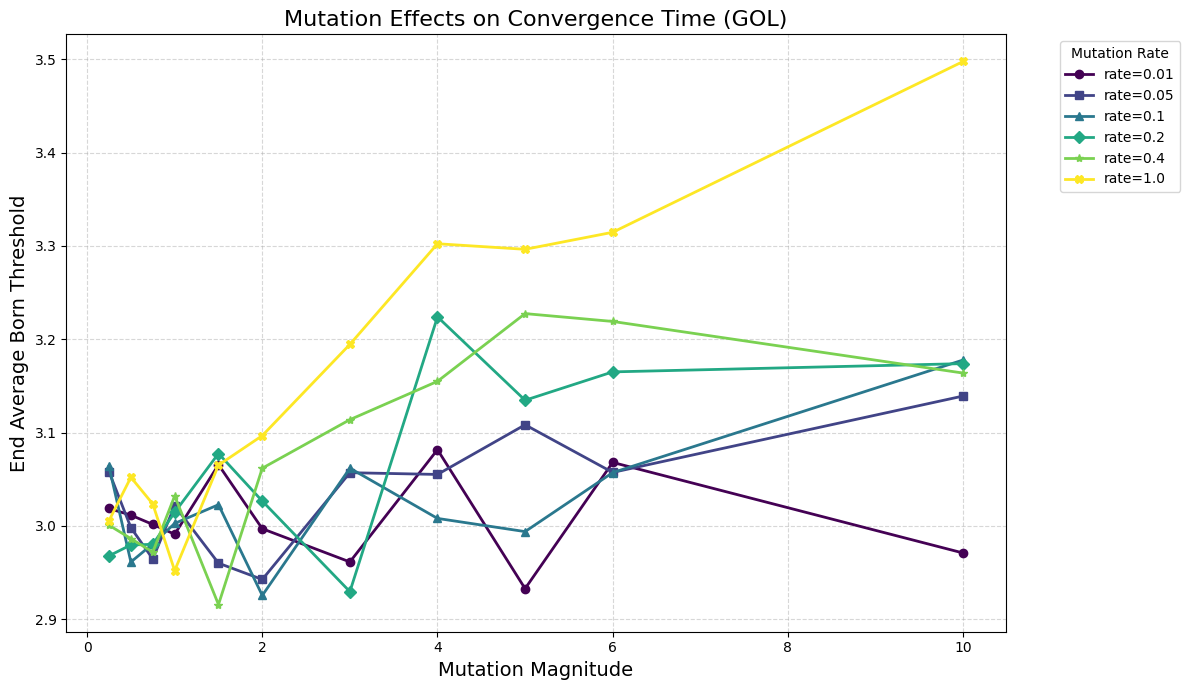

In [13]:
# Plotting
colors = plt.cm.viridis(np.linspace(0, 1, len(mutation_rates)))
markers = ['o', 's', '^', 'D', '*', 'X', 'P']

plt.figure(figsize=(12, 7))
for i, rate in enumerate(mutation_rates):
    xs = [mag for r, mag, avg_born_threshold in avg_born_thresholds if r == rate]
    ys = [avg_born_threshold for r, mag, avg_born_threshold in avg_born_thresholds if r == rate]
    plt.plot(xs, ys, color=colors[i], marker=markers[i], label=f"rate={rate}", linewidth=2)

plt.xlabel("Mutation Magnitude", fontsize=14)
plt.ylabel("End Average Born Threshold", fontsize=14)
plt.title("Mutation Effects on Convergence Time (GOL)", fontsize=16)
plt.legend(title="Mutation Rate", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("output/mutation_vs_born_threshold.png")
plt.show()

### Figure B

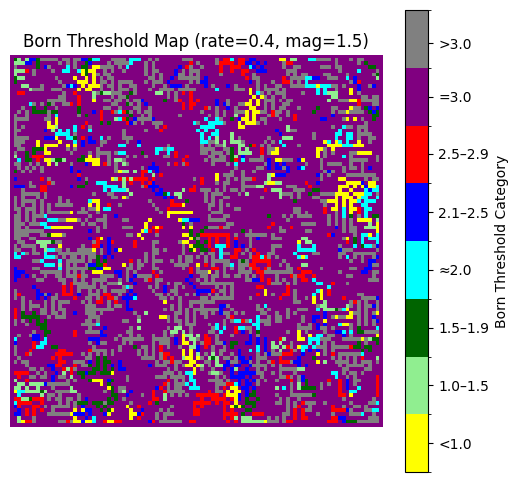

In [17]:
# Define parameters
rate = 0.4
mag = 1.5

# Credit to chatGPT: Showing me how to plot the heatmap

# Define custom colormap and value boundaries
cmap = ListedColormap(['yellow', 'lightgreen', 'darkgreen', 'aqua', 'blue', 'red', 'purple', 'gray'])  
norm = BoundaryNorm([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 2.99, 3.01, 10.0], len(cmap.colors))

# Plot figure
plt.figure(figsize=(6, 6))
im = plt.imshow(figure5b_board, cmap=cmap, norm=norm) 
plt.title(f'Born Threshold Map (rate={rate}, mag={mag})')
plt.axis('off')

# Colorbar with matching tick locations and labels
ticks = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.0, 6.0]
labels = ['<1.0', '1.0–1.5', '1.5–1.9', '≈2.0', '2.1–2.5', '2.5–2.9', '=3.0', '>3.0']
cbar = plt.colorbar(im, ticks=ticks)
cbar.ax.set_yticklabels(labels)
cbar.set_label('Born Threshold Category')

# Save figure
plt.savefig(f"output/born_threshold_map_rate_{rate}_mag_{mag}.png", bbox_inches='tight')
plt.show()

### Figure C

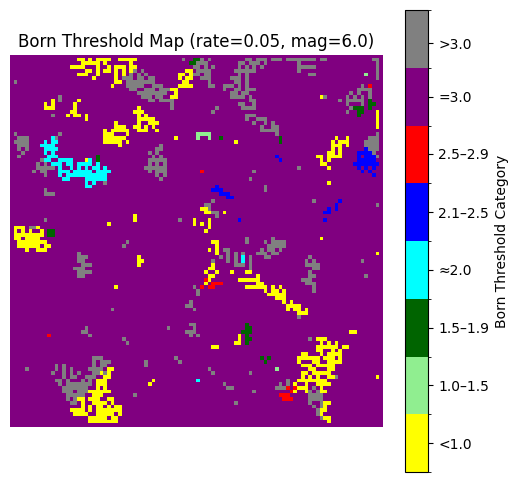

In [18]:
# Define parameters
rate = 0.05
mag = 6.0

# Credit to chatGPT: Showing me how to plot the heatmap

# Define custom colormap and value boundaries
cmap = ListedColormap(['yellow', 'lightgreen', 'darkgreen', 'aqua', 'blue', 'red', 'purple', 'gray'])  
norm = BoundaryNorm([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 2.99, 3.01, 10.0], len(cmap.colors))

# Plot figure
plt.figure(figsize=(6, 6))
im = plt.imshow(figure5c_board, cmap=cmap, norm=norm) 
plt.title(f'Born Threshold Map (rate={rate}, mag={mag})')
plt.axis('off')

# Colorbar with matching tick locations and labels
ticks = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.0, 6.0]
labels = ['<1.0', '1.0–1.5', '1.5–1.9', '≈2.0', '2.1–2.5', '2.5–2.9', '=3.0', '>3.0']
cbar = plt.colorbar(im, ticks=ticks)
cbar.ax.set_yticklabels(labels)
cbar.set_label('Born Threshold Category')

# Save figure
plt.savefig(f"output/born_threshold_map_rate_{rate}_mag_{mag}.png", bbox_inches='tight')
plt.show()

## Figure 6

### Figure A

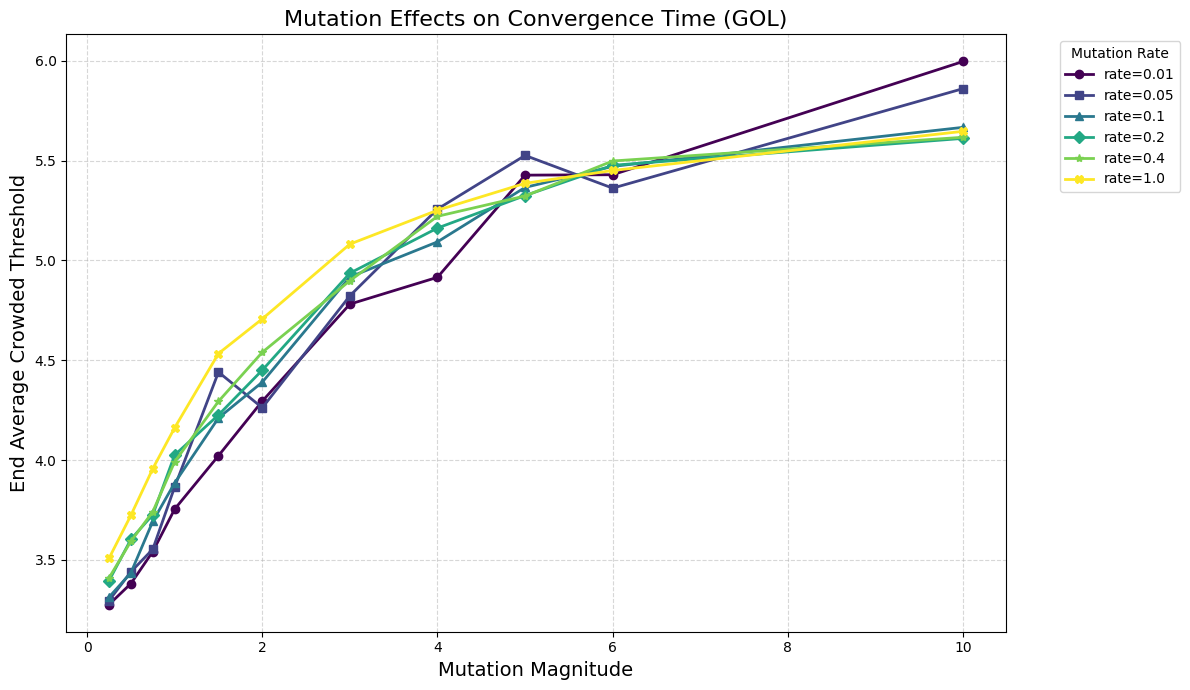

In [14]:
# Plotting
colors = plt.cm.viridis(np.linspace(0, 1, len(mutation_rates)))
markers = ['o', 's', '^', 'D', '*', 'X', 'P']

plt.figure(figsize=(12, 7))
for i, rate in enumerate(mutation_rates):
    xs = [mag for r, mag, avg_crowded_threshold in avg_crowded_thresholds if r == rate]
    ys = [avg_crowded_threshold for r, mag, avg_crowded_threshold in avg_crowded_thresholds if r == rate]
    plt.plot(xs, ys, color=colors[i], marker=markers[i], label=f"rate={rate}", linewidth=2)

plt.xlabel("Mutation Magnitude", fontsize=14)
plt.ylabel("End Average Crowded Threshold", fontsize=14)
plt.title("Mutation Effects on Convergence Time (GOL)", fontsize=16)
plt.legend(title="Mutation Rate", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("output/mutation_vs_crowded_threshold.png")
plt.show()

### Figure B

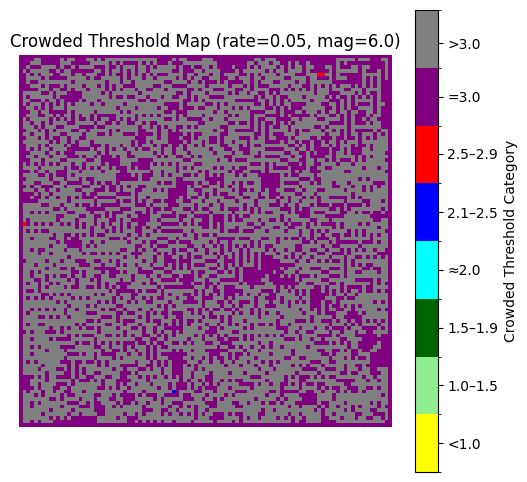

In [20]:
# Define parameters
rate = 0.05
mag = 6.0

# Credit to chatGPT: Showing me how to plot the heatmap

# Define custom colormap and value boundaries
cmap = ListedColormap(['yellow', 'lightgreen', 'darkgreen', 'aqua', 'blue', 'red', 'purple', 'gray'])  
norm = BoundaryNorm([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 2.99, 3.01, 10.0], len(cmap.colors))

# Plot figure
plt.figure(figsize=(6, 6))
im = plt.imshow(figure6b_board, cmap=cmap, norm=norm) 
plt.title(f'Crowded Threshold Map (rate={rate}, mag={mag})')
plt.axis('off')

# Colorbar with matching tick locations and labels
ticks = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.0, 6.0]
labels = ['<1.0', '1.0–1.5', '1.5–1.9', '≈2.0', '2.1–2.5', '2.5–2.9', '=3.0', '>3.0']
cbar = plt.colorbar(im, ticks=ticks)
cbar.ax.set_yticklabels(labels)
cbar.set_label('Crowded Threshold Category')

# Save figure
plt.savefig(f"output/crowded_threshold_map_rate_{rate}_mag_{mag}.png", bbox_inches='tight')
plt.show()

### Figure C

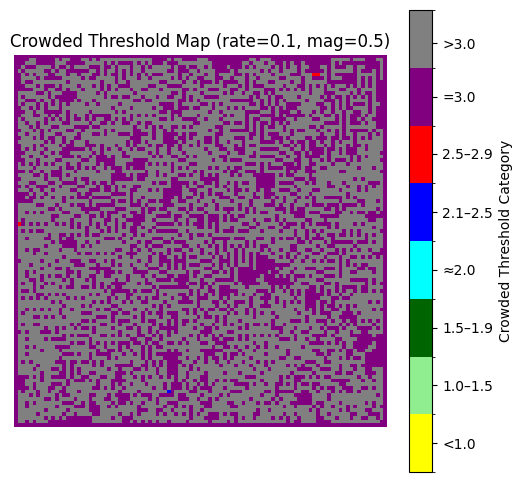

In [21]:
# Define parameters
rate = 0.1
mag = 0.5

# Credit to chatGPT: Showing me how to plot the heatmap

# Define custom colormap and value boundaries
cmap = ListedColormap(['yellow', 'lightgreen', 'darkgreen', 'aqua', 'blue', 'red', 'purple', 'gray'])  
norm = BoundaryNorm([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 2.99, 3.01, 10.0], len(cmap.colors))

# Plot figure
plt.figure(figsize=(6, 6))
im = plt.imshow(figure6b_board, cmap=cmap, norm=norm) 
plt.title(f'Crowded Threshold Map (rate={rate}, mag={mag})')
plt.axis('off')

# Colorbar with matching tick locations and labels
ticks = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.0, 6.0]
labels = ['<1.0', '1.0–1.5', '1.5–1.9', '≈2.0', '2.1–2.5', '2.5–2.9', '=3.0', '>3.0']
cbar = plt.colorbar(im, ticks=ticks)
cbar.ax.set_yticklabels(labels)
cbar.set_label('Crowded Threshold Category')

# Save figure
plt.savefig(f"output/crowded_threshold_map_rate_{rate}_mag_{mag}.png", bbox_inches='tight')
plt.show()